# Getting start

We show you a simple guide on how to use GeNePy3D to analyze your 3D data. The jupyter notebook of this page can be downloaded [here](https://gitlab.com/genepy3d/genepy3d.gitlab.io/-/tree/master/source/gettingstart.ipynb). GeNePy3D supports working with four common geometrical objects: tree, curve, points cloud and surface.



## Tree

Tree object is used to handle arborescent structure such as neuron cells. A neuron skeleton can be read from a SWC file:

In [1]:
from genepy3d.obj import trees
neuron = trees.Tree.from_swc("data/example_neuron.swc")

A short summary of the neuron such as number of nodes, leaves, branchings, etc can be displayed by:

In [2]:
print(neuron.summary())

id                                0
name                 example_neuron
root                            [1]
nb_nodes                      [182]
nb_leaves                      [11]
nb_branchingnodes               [4]
nb_connectors                   [0]
dtype: object


To visualize the neuron, we can use its `plot()` function:

<IPython.core.display.Javascript object>


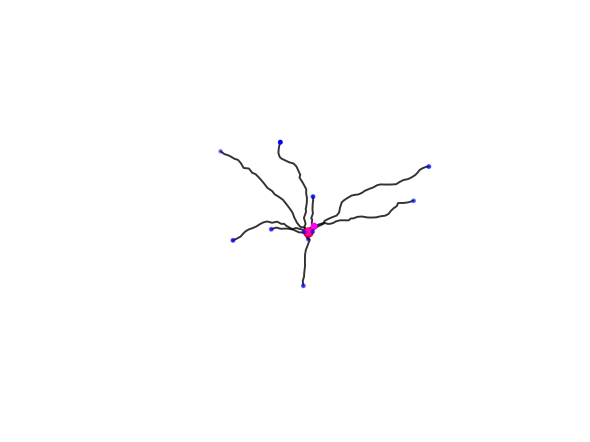

In [3]:
import matplotlib.pyplot as plt
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

neuron.plot(ax)

# Changing camera view and zoom for nicer visualization
ax.view_init(azim=4,elev=-61)
ax.dist = 8
ax.axis('off');

## Curve

To analyze a partial portion of the neuron, e.g. its longest branch starting from the root (or cell body), a Curve object can be used. Let's extract the longest branch from the above neuron tree:

In [4]:
nodes = neuron.compute_spine() # list of nodes along the longest branch
longest_branch = neuron.to_curve(nodes) # convert to Curve object

Then, plot it:

<IPython.core.display.Javascript object>


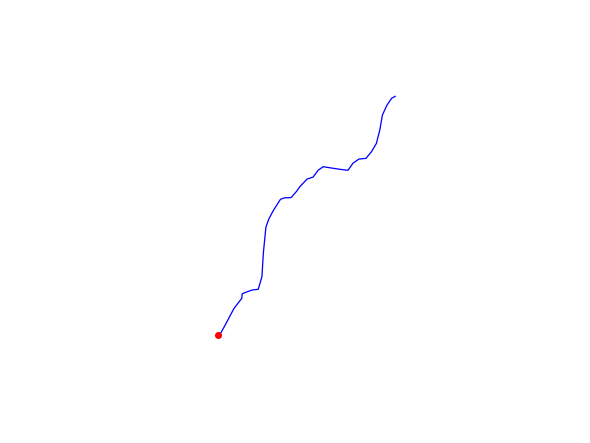

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

longest_branch.plot(ax)

ax.view_init(azim=4,elev=-61)
ax.dist = 8
ax.axis('off');

and print out some measurements:

In [6]:
print(longest_branch.compute_length())
print(longest_branch.compute_wiggliness())

113.89568302848858
1.157487445621743


## Points

The Points object is used to handle the points cloud in 3D. Let's plot an example of points lying on the boundary of a 3D ellipsoid.

<IPython.core.display.Javascript object>


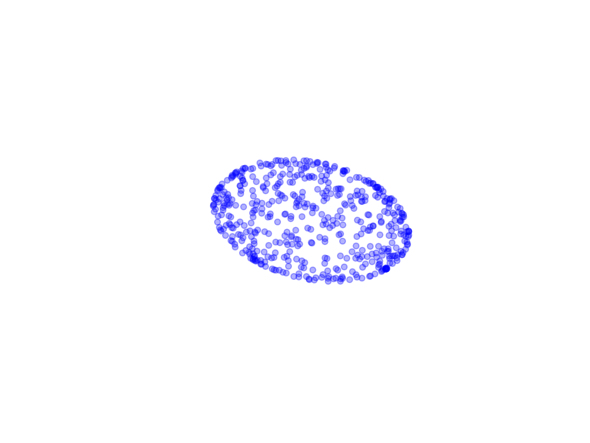

In [7]:
from genepy3d.obj import points

# A Points object with points on the boundary of a 3D ellipsoid
cloud = points.gen_ellipsoid(axes_length=(1.5,1.,1.),n=500)

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

cloud.plot(ax,point_args={'alpha':0.3})

ax.axis('off');

Then, apply a transformation by rotating by pi/2 around y axis and scaling the z coordinates twice.

<IPython.core.display.Javascript object>


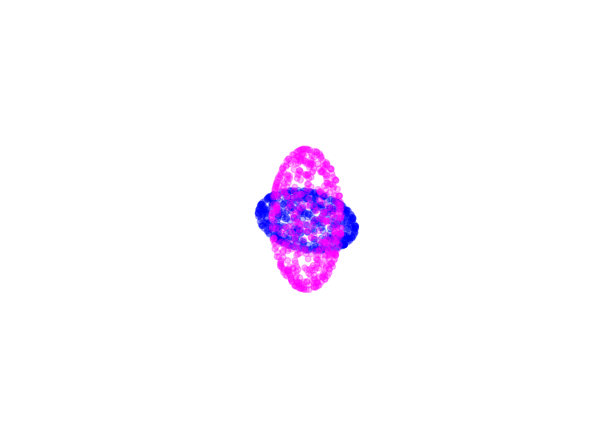

In [8]:
cloud_transformed = cloud.transform(theta=3.14/2.,zz=2.)

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

cloud.plot(ax,point_args={'alpha':0.3})

cloud_transformed.plot(ax,point_args={'alpha':0.3, 'color':'magenta'})

ax.dist = 6
ax.axis('off');

## Surface

The above points cloud can be converted to a Surface object by:

<IPython.core.display.Javascript object>


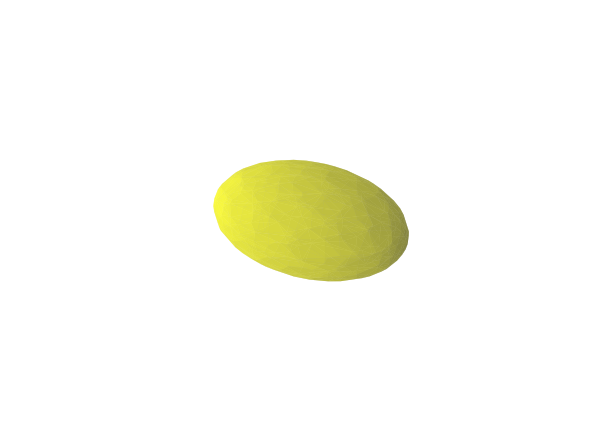

In [9]:
# Convert to Surface object by Convex Hull
outline = cloud.to_surface_qhull()

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
outline.plot(ax)

ax.axis('off');

The closeness of the surface can be checked by:

In [10]:
print("Is the surface closed (or watertight)?",outline.is_watertight)

Is the surface closed (or watertight)? True
